# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



632

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : acapulco
Processing Record 2 of Set 1 : bontang
Processing Record 3 of Set 1 : mataura
Processing Record 4 of Set 1 : rikitea
Processing Record 5 of Set 1 : olafsvik
Processing Record 6 of Set 1 : jamestown
Processing Record 7 of Set 1 : ushuaia
Processing Record 8 of Set 1 : mlonggo
City not found. Skipping...
Processing Record 9 of Set 1 : luxor
Processing Record 10 of Set 1 : punta arenas
Processing Record 11 of Set 1 : new norfolk
Processing Record 12 of Set 1 : avarua
City not found. Skipping...
Processing Record 13 of Set 1 : san patricio
Processing Record 14 of Set 1 : kununurra
Processing Record 15 of Set 1 : pisco
Processing Record 16 of Set 1 : saldanha
Processing Record 17 of Set 1 : lompoc
Processing Record 18 of Set 1 : hamilton
City not found. Skipping...
Processing Record 19 of Set 1 : srivardhan
Processing Record 20 of Set 1 : katsuura
Processing Record 21 of Set 1 : lagoa
Processing 

Processing Record 33 of Set 4 : togur
Processing Record 34 of Set 4 : emerald
Processing Record 35 of Set 4 : faanui
Processing Record 36 of Set 4 : bulolo
Processing Record 37 of Set 4 : mkushi
Processing Record 38 of Set 4 : vilyuysk
Processing Record 39 of Set 4 : kamaishi
Processing Record 40 of Set 4 : vao
Processing Record 41 of Set 4 : thinadhoo
Processing Record 42 of Set 4 : matara
Processing Record 43 of Set 4 : yantal
Processing Record 44 of Set 4 : tasiilaq
Processing Record 45 of Set 4 : tuktoyaktuk
Processing Record 46 of Set 4 : ancud
Processing Record 47 of Set 4 : port hardy
Processing Record 48 of Set 4 : haines junction
Processing Record 49 of Set 4 : davila
Processing Record 50 of Set 4 : lavrentiya
Processing Record 0 of Set 5 : khatanga
Processing Record 1 of Set 5 : yumen
Processing Record 2 of Set 5 : yima
City not found. Skipping...
Processing Record 3 of Set 5 : sid
Processing Record 4 of Set 5 : gazanjyk
Processing Record 5 of Set 5 : mikuni
Processing Record

Processing Record 12 of Set 8 : kentau
Processing Record 13 of Set 8 : kyra
Processing Record 14 of Set 8 : iquique
Processing Record 15 of Set 8 : ciudad bolivar
Processing Record 16 of Set 8 : koslan
Processing Record 17 of Set 8 : ketchikan
Processing Record 18 of Set 8 : asfi
Processing Record 19 of Set 8 : turan
Processing Record 20 of Set 8 : pingdingshan
Processing Record 21 of Set 8 : sabang
City not found. Skipping...
Processing Record 22 of Set 8 : bougouni
Processing Record 23 of Set 8 : xaltianguis
Processing Record 24 of Set 8 : fortuna foothills
Processing Record 25 of Set 8 : isla mujeres
Processing Record 26 of Set 8 : hohhot
City not found. Skipping...
Processing Record 27 of Set 8 : qaqortoq
City not found. Skipping...
Processing Record 28 of Set 8 : beringovskiy
Processing Record 29 of Set 8 : muros
Processing Record 30 of Set 8 : antalaha
Processing Record 31 of Set 8 : terre haute
Processing Record 32 of Set 8 : presidencia roque saenz pena
Processing Record 33 of 

Processing Record 46 of Set 11 : ambulu
Processing Record 47 of Set 11 : kaitangata
Processing Record 48 of Set 11 : kaoma
Processing Record 49 of Set 11 : parnamirim
Processing Record 50 of Set 11 : roma
Processing Record 0 of Set 12 : aripuana
Processing Record 1 of Set 12 : winchester
Processing Record 2 of Set 12 : kemijarvi
Processing Record 3 of Set 12 : clinton
Processing Record 4 of Set 12 : narodychi
Processing Record 5 of Set 12 : alyangula
Processing Record 6 of Set 12 : rimbey
Processing Record 7 of Set 12 : leningradskiy
Processing Record 8 of Set 12 : fort nelson
Processing Record 9 of Set 12 : comodoro rivadavia
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [6]:
# Count data
weather_dict.count()
# Display the Data Frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Acapulco de Juárez,40,MX,1640000064,83,16.8634,-99.8901,75.02,4.61
1,Bontang,100,ID,1640000080,86,0.1333,117.5000,78.71,3.31
2,Mataura,8,NZ,1639999993,51,-46.1927,168.8643,55.47,9.95
3,Rikitea,100,PF,1639999994,85,-23.1203,-134.9692,73.87,17.74
4,Olafsvik,65,IS,1640000011,79,64.8945,-23.7142,41.81,1.12
...,...,...,...,...,...,...,...,...,...
565,Alyangula,99,AU,1640000162,94,-13.8483,136.4192,78.67,5.75
566,Rimbey,52,CA,1640000491,93,52.6334,-114.2353,-3.48,3.80
567,Leningradskiy,89,RU,1640000027,70,69.3833,178.4167,-10.35,21.68
568,Fort Nelson,1,CA,1640000123,76,58.8053,-122.7002,-20.61,2.30


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

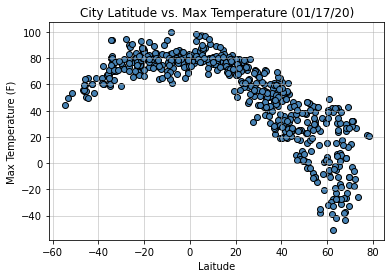

In [7]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Humidity Plot

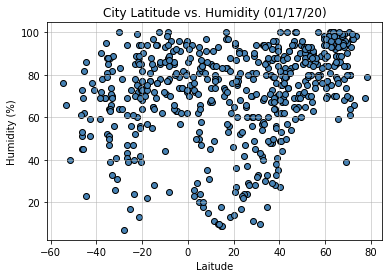

In [8]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Cloudiness Plot

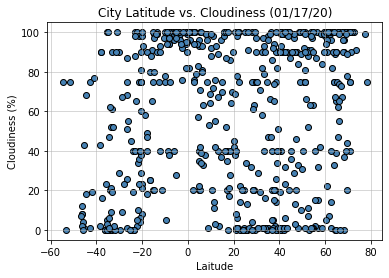

In [9]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Wind Speed Plot

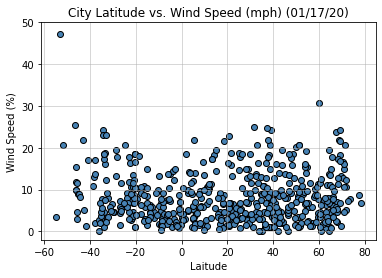

In [10]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression